In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
db = pd.read_csv(r'C:/Users/Khush Kalavadia/Documents/StudentsPerformance.csv')
db.head()    #db=database

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
db.shape

(1000, 8)

1000 rows and 8 columns

In [16]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**All the values are present. No null value is present.**
1. Gender, race, parental level of education, lunch, test preparation course are all categorical variable
2. Math, reading, writing score are all numerical variable

In [17]:
db.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


This will help us knowing the nature of numerical data.\
Now we know the average marks of student in all three subject. Let's observe the distribution of marks through plot.

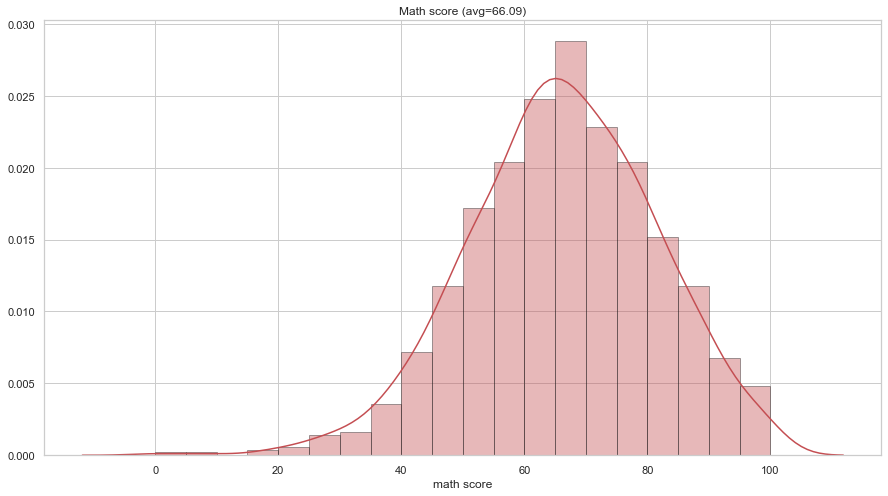

In [139]:
plt.figure(figsize=(15,8))
sns.distplot(db['math score'], bins=20, hist_kws=dict(edgecolor='k', linewidth=1), color='r')
plt.title('Math score (avg=66.09)')
plt.show()

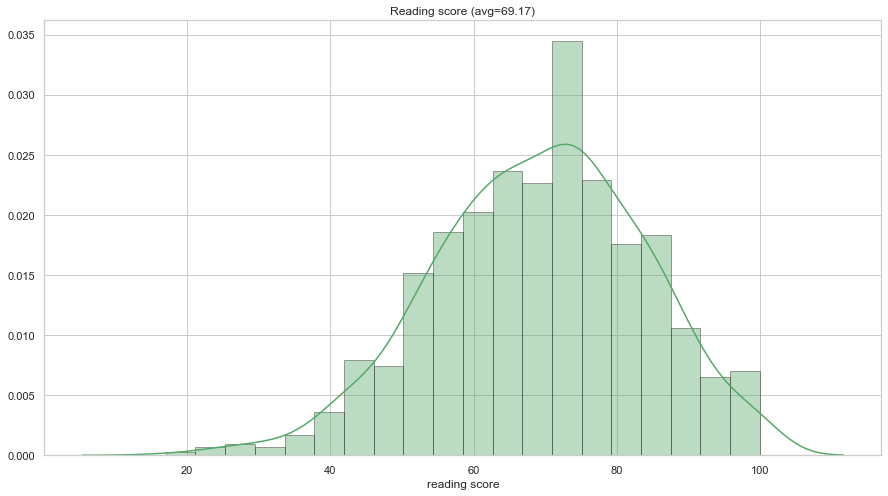

In [140]:
plt.figure(figsize=(15,8))
sns.distplot(db['reading score'], bins=20, hist_kws=dict(edgecolor='k', linewidth=1), color='g')
plt.title('Reading score (avg=69.17)')
plt.show()

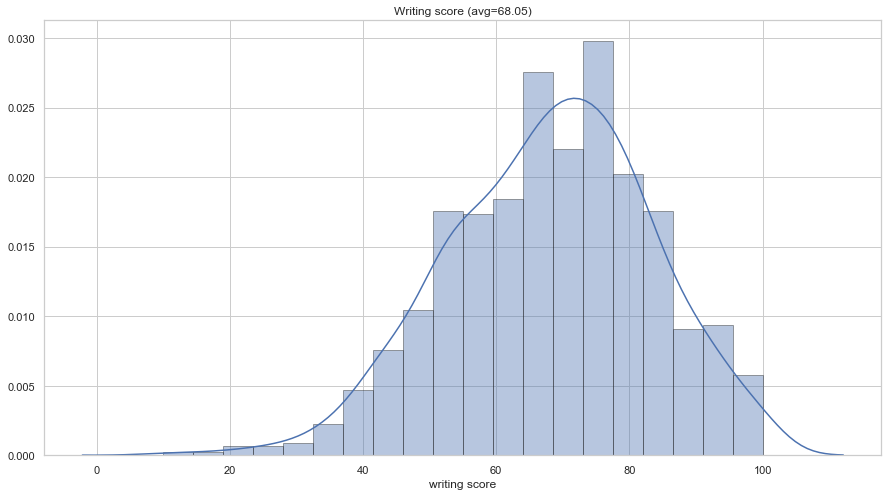

In [141]:
plt.figure(figsize=(15,8))
sns.distplot(db['writing score'], bins=20, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Writing score (avg=68.05)')
plt.show()

From these graphs we can say that maximum of the students are **centered in a specific range of score**. Let's accurately see what is the range. 

Math scores of most students lie between  57.0  -  77.0


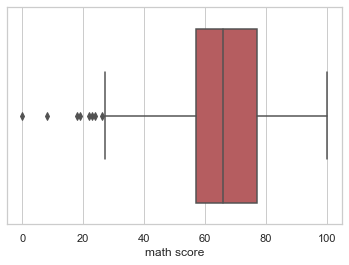

In [93]:
sns.set_style("whitegrid")
sns.boxplot(x=db['math score'], color = 'r')
print('Math scores of most students lie between ', db['math score'].quantile(.25), ' - ', db['math score'].quantile(.75))

Reading scores of most students lie between  59.0  -  79.0


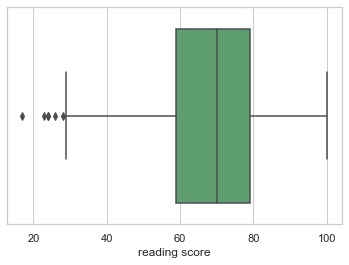

In [99]:
sns.set_style("whitegrid")
sns.boxplot(x=db['reading score'], color = 'g')
print('Reading scores of most students lie between ', db['reading score'].quantile(.25), ' - ', db['reading score'].quantile(.75))

Writing scores of most students lie between  57.75  -  79.0


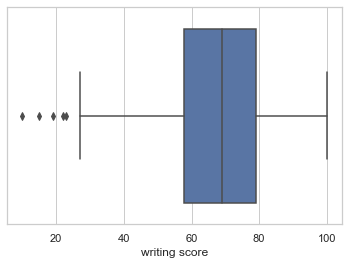

In [100]:
sns.set_style("whitegrid")
sns.boxplot(x=db['writing score'])
print('Writing scores of most students lie between ', db['writing score'].quantile(.25), ' - ', db['writing score'].quantile(.75))

**Observing this data we can say that the scores of most students lie between 60 to 80.**

To study the behaviour of marks the first attribute which we can use is gender.

In [113]:
db['gender'].unique()

array(['female', 'male'], dtype=object)

This means that there are only 2 gender in the database and it also shows that there are only two string value present in it.\
Now we will see the gender wise average score in each subject.

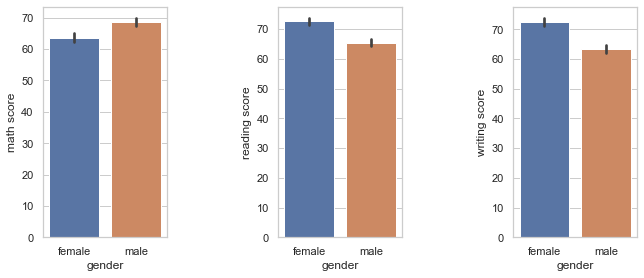

In [179]:
plt.subplots_adjust(left=0.125, right=1.5, bottom=0.1, top=0.9, wspace=0.9, hspace=0.4)

plt.subplot(131)
sns.barplot(x=db['gender'], y=db['math score'])
plt.subplot(132)
sns.barplot(x=db['gender'], y=db['reading score'])
plt.subplot(133)
sns.barplot(x=db['gender'], y=db['writing score'])

This shows that **male have gained more average score in Math while in Reading and writing female students have more average score**.

Now let us take other attributes into the consideration.

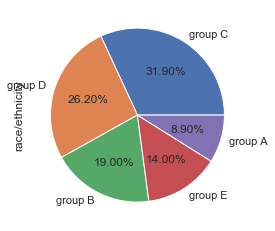

In [133]:
db['race/ethnicity'].value_counts().plot.pie(autopct="%1.2f%%")

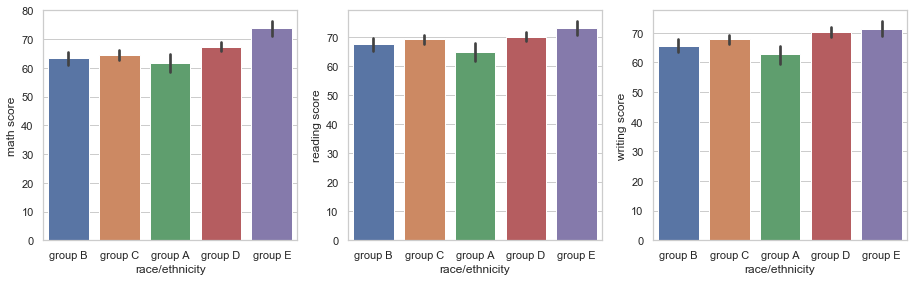

In [317]:
plt.subplots_adjust(left=0, right=2, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

plt.subplot(131)
sns.barplot(x=db['race/ethnicity'], y=db['math score'])

plt.subplot(132)
sns.barplot(x=db['race/ethnicity'], y=db['reading score'])

plt.subplot(133)
sns.barplot(x=db['race/ethnicity'], y=db['writing score'])    

From this we can see **Group E is doing best** while the average score of those from **group A is worst**.

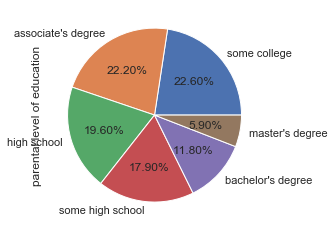

In [132]:
db['parental level of education'].value_counts().plot.pie(autopct="%1.2f%%")

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

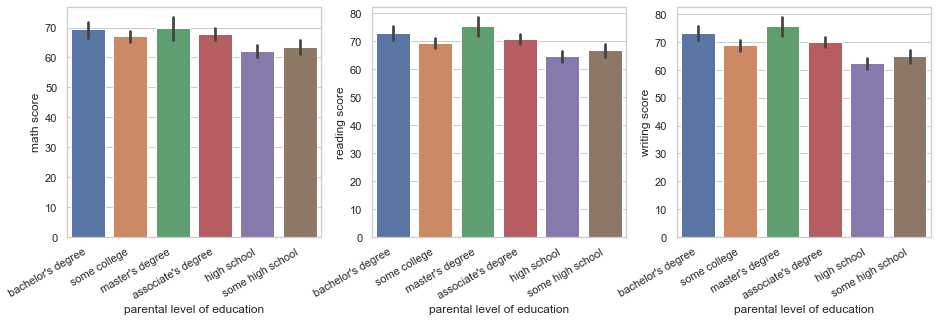

In [348]:
plt.subplots_adjust(left=0, right=2, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

plt.subplot(131)
p1=sns.barplot(x='parental level of education', y='math score', data=db)
p1.set_xticklabels(p1.get_xticklabels(), rotation=30, ha="right")

plt.subplot(132)
p2=sns.barplot(x=db['parental level of education'], y=db['reading score'])
p2.set_xticklabels(p2.get_xticklabels(), rotation=30, ha="right")

plt.subplot(133)
p3=sns.barplot(x=db['parental level of education'], y=db['writing score'])    
p3.set_xticklabels(p3.get_xticklabels(), rotation=30, ha="right")

Whose parents education is **Master's degree are performing best** even the students whose parents education is Bachelore's degree, Associate's degree and from some college are also doing well.\
The students whose parents are from **high school or not not even high school are comparitively not doing so well**. 

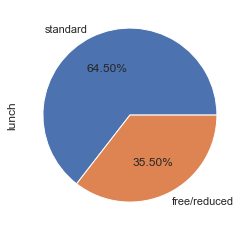

In [129]:
db['lunch'].value_counts().plot.pie(autopct="%1.2f%%")

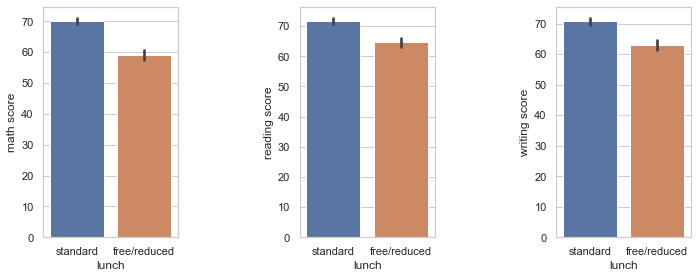

In [319]:
plt.subplots_adjust(left=0, right=1.5, bottom=0.1, top=0.9, wspace=0.9, hspace=0.4)

plt.subplot(131)
sns.barplot(x=db['lunch'], y=db['math score'])

plt.subplot(132)
sns.barplot(x=db['lunch'], y=db['reading score'])

plt.subplot(133)
sns.barplot(x=db['lunch'], y=db['writing score'])    

The student who are having **standard lunch are doing well** while those having free/reduced are comparatively not doing so well.

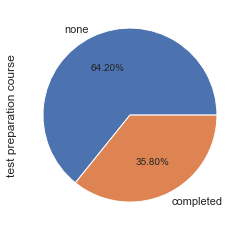

In [305]:
db['test preparation course'].value_counts().plot.pie(autopct="%1.2f%%")

**Two-third** of the students have not finished the test preparation.

Difference of average score between those who have completed and not completed test preparation:
In math, it is  5.62
In reading, it is  7.36
In writing, it is  9.91
Overall difference is  7.63


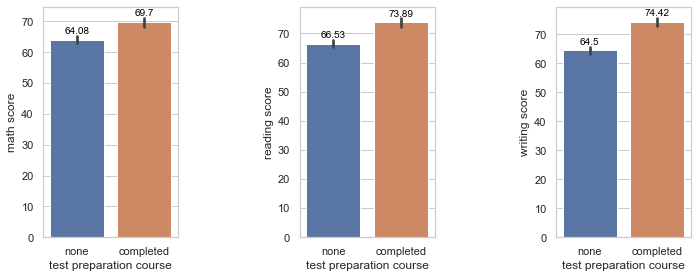

In [325]:
plt.subplots_adjust(left=0, right=1.5, bottom=0.1, top=0.9, wspace=0.9, hspace=0.4)
print('Difference of average score between those who have completed and not completed test preparation:')

plt.subplot(131)
p1=sns.barplot(x=db['test preparation course'], y=db['math score'])
v11=db[db['test preparation course']=='none']['math score'].mean()
v12=db[db['test preparation course']=='completed']['math score'].mean()
p1.text(0,v11+2, round(v11,2), color='black', ha="center")
p1.text(1,v12+2, round(v12,2), color='black', ha="center")
print('In math, it is ',round(v12-v11,2))

plt.subplot(132)
p2=sns.barplot(x=db['test preparation course'], y=db['reading score'])
v21=db[db['test preparation course']=='none']['reading score'].mean()
v22=db[db['test preparation course']=='completed']['reading score'].mean()
p2.text(0,v21+2, round(v21,2), color='black', ha="center")
p2.text(1,v22+2, round(v22,2), color='black', ha="center")
print('In reading, it is ',round(v22-v21,2))

plt.subplot(133)
p3=sns.barplot(x=db['test preparation course'], y=db['writing score'])    
v31=db[db['test preparation course']=='none']['writing score'].mean()
v32=db[db['test preparation course']=='completed']['writing score'].mean()
p3.text(0,v31+2, round(v31,2), color='black', ha="center")
p3.text(1,v32+2, round(v32,2), color='black', ha="center")
print('In writing, it is ',round(v32-v31,2))

print('Overall difference is ', round((v12-v11+v22-v21+v32-v31)/3,2))

We can view that those student who have **completed test preparation course are doing well** than those who haven't by **7.63%**.\
Here, it was important to know that how much better they are doing.

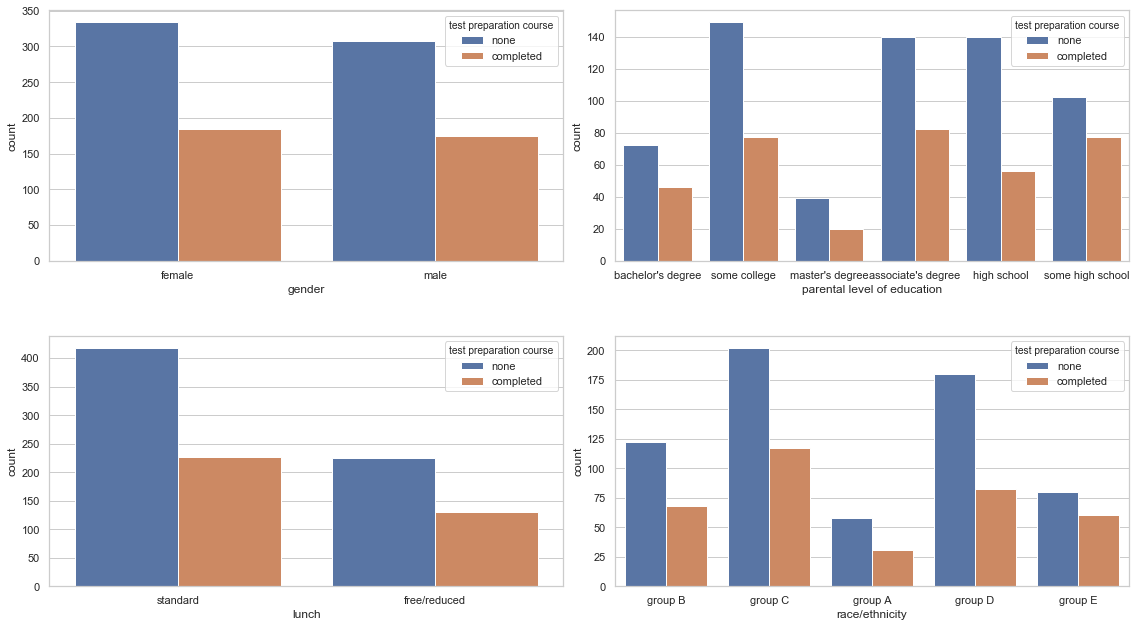

In [526]:
plt.subplots_adjust(left=0, right=2.5, bottom=0, top=2, wspace=0.1, hspace=0.3)


plt.subplot(221)
sns.countplot(x='gender', hue='test preparation course', data=db)

plt.subplot(222)
sns.countplot(x='parental level of education', hue='test preparation course', data=db)

plt.subplot(223)
sns.countplot(x='lunch', hue='test preparation course', data=db)

plt.subplot(224)
sns.countplot(x='race/ethnicity', hue='test preparation course', data=db)

The number of student who have completed test preparation and avail standard lunch are more than those who have completed course and have free lunch.

Maximum number of student who have **completed test preparation are from group C** and those who haven't are also from same group.

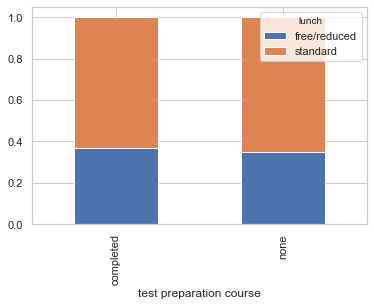

In [557]:
gr=pd.crosstab(db['test preparation course'], db['lunch'], normalize=0)
gr.plot.bar(stacked=True)
plt.show()

Those who have standard lunch have and haven't completed the test preparation course are **in equal proportion**.

We observed that how different attributes affect the score. Now, we will add the **average score.**

In [420]:
db['average marks']=round(( (db['math score']+db['reading score']+db['writing score'])/3 ), 2)

In [424]:
db.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average marks
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


We will also introduce a **passing criteria** of 33%. Hence, we will insert a column pass status. 

In [425]:
db['pass status'] = (db['average marks']>33)

In [426]:
db.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average marks,pass status
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,True
1,female,group C,some college,standard,completed,69,90,88,82.33,True
2,female,group B,master's degree,standard,none,90,95,93,92.67,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,True
4,male,group C,some college,standard,none,76,78,75,76.33,True


Let's get the exact number of student who failed.

In [436]:
db['pass status'].value_counts()

True     985
False     15
Name: pass status, dtype: int64

Now using all the observation, I have made defined a **"star student"**. Basically, This is assigned to only those students who have those attributes which are showing comparitively better average marks.

Star student includes **Group E or Group D(around 40%), test preparation completed, Standard lunch and Parental education of Master's, Associate's, Bacholar's degree**(around 40%).

In [472]:
bool1 = (db['race/ethnicity'].isin(['group E','group D'])) & (db['parental level of education'].isin(["master's degree","associate's degree","bacholar's degree"])) & (db['lunch'] == 'standard') & (db['test preparation course'] == 'completed')
value=  np.where(bool1,'Yes','No') 
db.insert(10, 'star student', value)

In [473]:
db.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average marks,pass status,star student
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,True,No
1,female,group C,some college,standard,completed,69,90,88,82.33,True,No
2,female,group B,master's degree,standard,none,90,95,93,92.67,True,No
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,True,No
4,male,group C,some college,standard,none,76,78,75,76.33,True,No


In [510]:
db['star student'].value_counts()

No     977
Yes     23
Name: star student, dtype: int64

In [489]:
db[db['star student']=='Yes']['pass status'].value_counts()

True    23
Name: pass status, dtype: int64

All 23 of the star student have passed the exam. **None of the Star student have failed.**

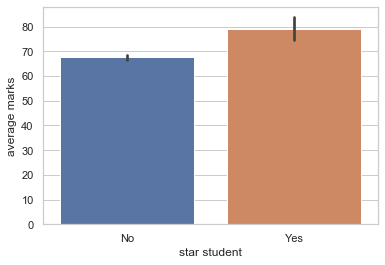

In [474]:
sns.barplot(x='star student', y='average marks', data=db)

Star student have performed performed **comparatively very well in exam**.

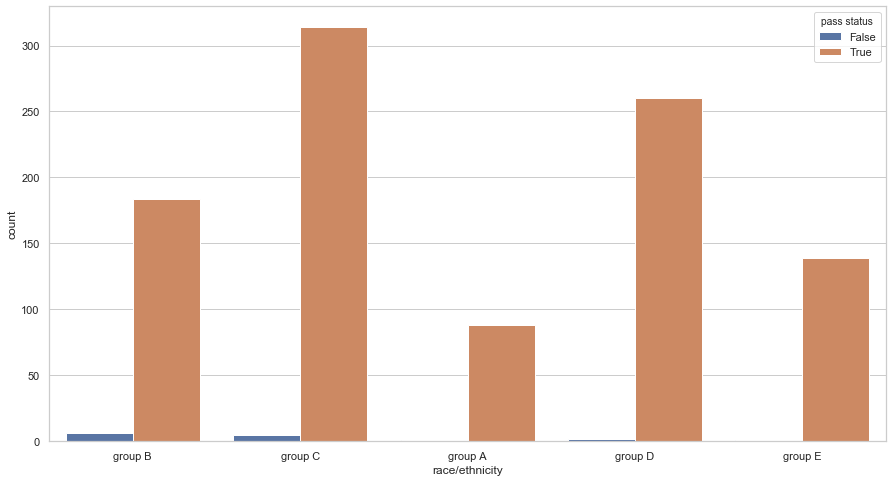

In [542]:
plt.figure(figsize=(15,8))

sns.countplot(x='race/ethnicity', hue='pass status', data=db)

Less number of students from **group A and group E** have failed the exam.

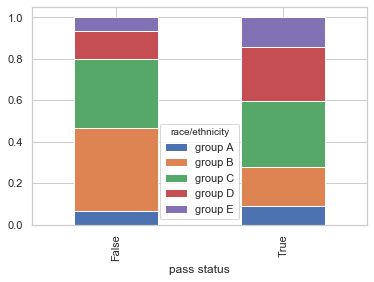

In [543]:
gr=pd.crosstab(db['pass status'], db['race/ethnicity'], normalize=0)
gr.plot.bar(stacked=True)
plt.show()

This clearly shows those who have failed the exam are **less in proportion from group E** than in comparison to those who have passed.\
While those in **group B have proportionately more failed** than those who have passed.

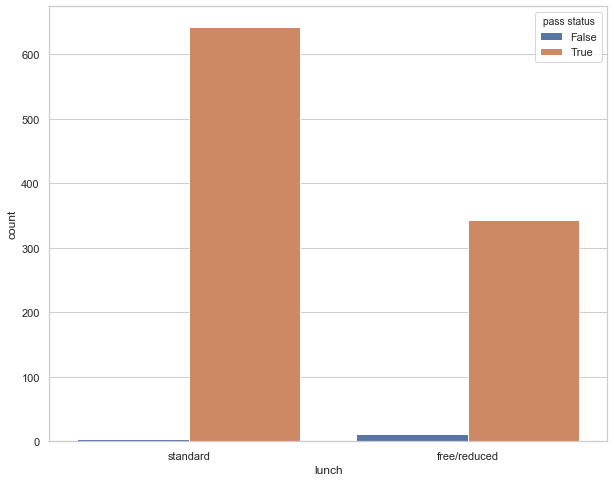

In [551]:
plt.figure(figsize=(10,8))
sns.countplot( hue='pass status', x='lunch', data=db)


The number of students taking standard lunch is more even though **the number of students failing is very less**. Even as we saw the average of students having standard lunch was more than those having free.